# Iris Flower Classification

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [2]:
df = pd.read_csv("2주차/iris.csv")
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## 데이터 확인

In [3]:
# 데이터 확인
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
# 컬렴명 확인
df.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Name'], dtype='object')

([0, 1, 2],
 [Text(0, 0, 'Iris-setosa'),
  Text(1, 0, 'Iris-versicolor'),
  Text(2, 0, 'Iris-virginica')])

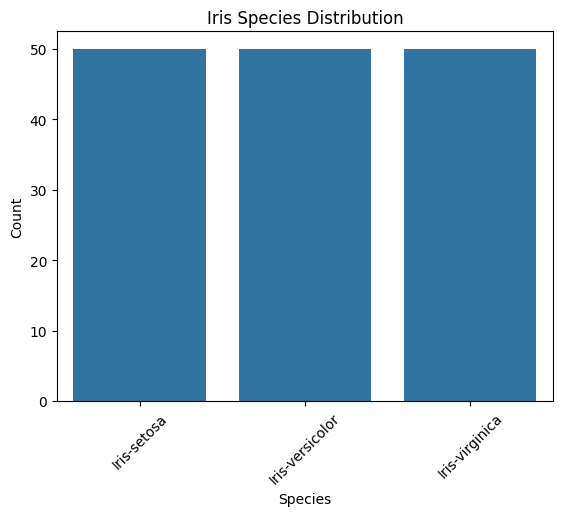

In [5]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="Name")
plt.xlabel("Species")
plt.ylabel("Count")
plt.title("Iris Species Distribution")
plt.xticks(rotation=45)

In [6]:
# 레이블 갯수 확인 (숫자)
df['Name'].value_counts()

Name
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [7]:
# 결측치 확인
df.isnull().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Name           0
dtype: int64

In [8]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Name           0
dtype: int64

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_12236\4107765831.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SepalLength'], kde = True, hist = False, ax=ax1)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_12236\4107765831.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<Axes: xlabel='PetalLength', ylabel='Density'>

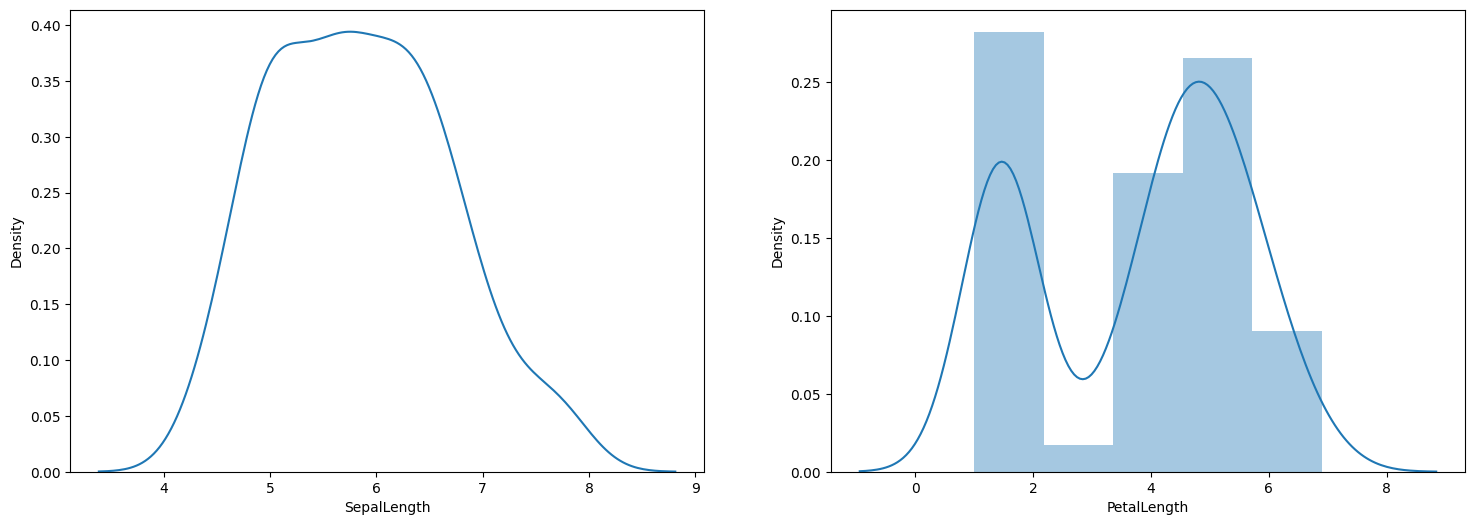

In [9]:
# 컬럼별 히스토그램 확인
# 'SepalLength'와 'PetalLength' 칼럼을 선택

figure = plt.figure(figsize=(18,6))
ax1 = plt.subplot(1,2,1)
sns.distplot(df['SepalLength'], kde = True, hist = False, ax=ax1)
ax2 = plt.subplot(1,2,2)
sns.distplot(df['PetalLength'], ax=ax2)

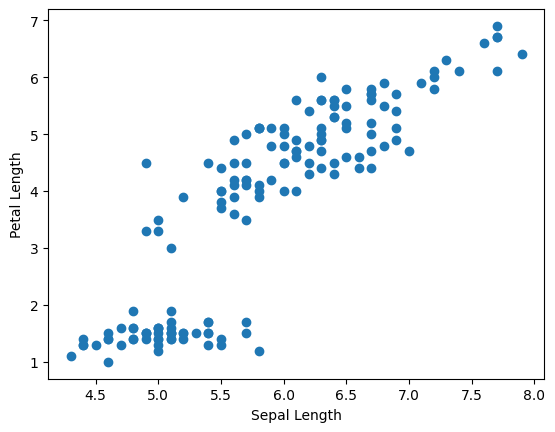

In [10]:
# 산점도 확인

import matplotlib.pyplot as plt
import numpy as np

plt.scatter(df['SepalLength'], df['PetalLength'])
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')

plt.show()

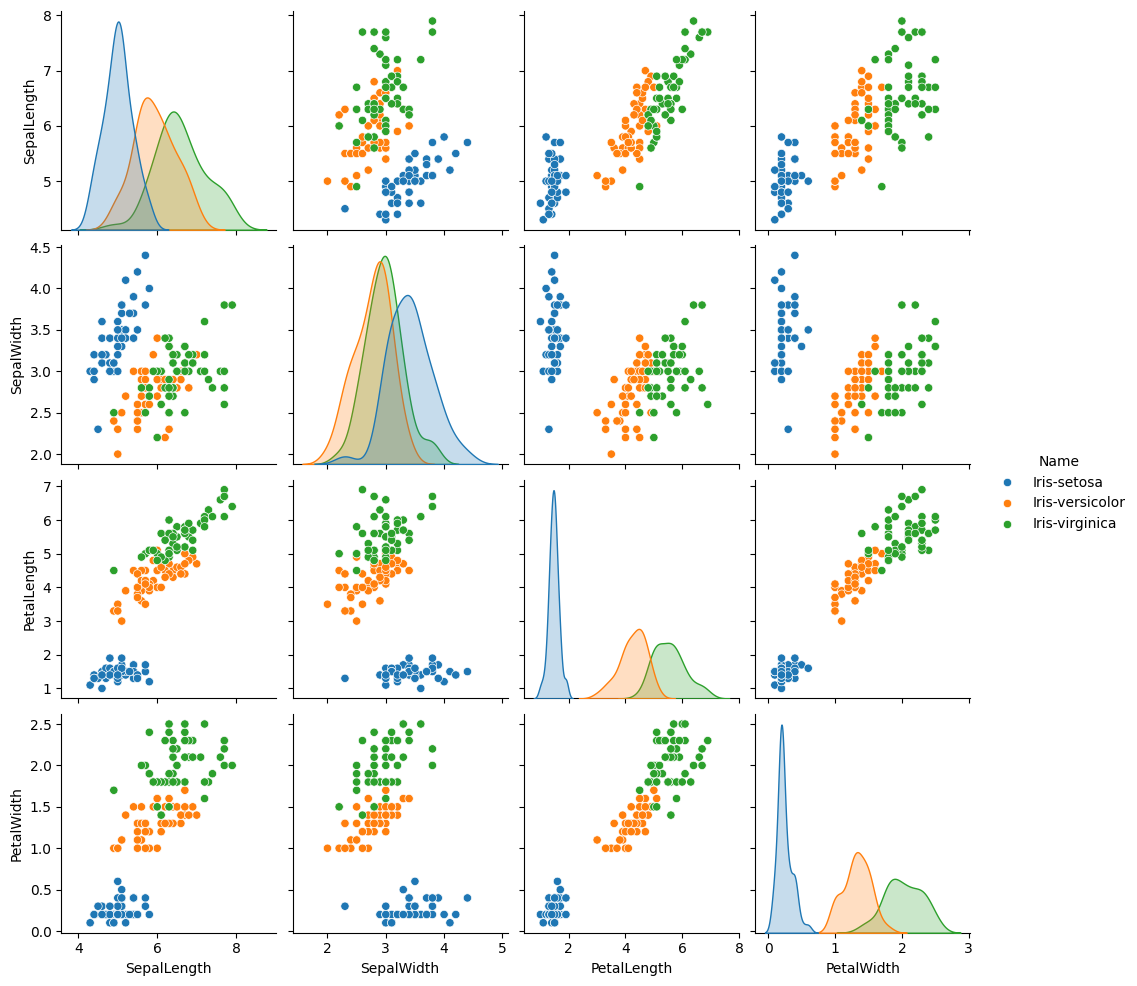

In [11]:
# pairplot를 사용해 각 상관관계 살펴보기

sns.pairplot(df,
             vars=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'],
            hue ='Name')
plt.show()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_12236\3506165226.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="PetalLength", data=df, palette="Set3")


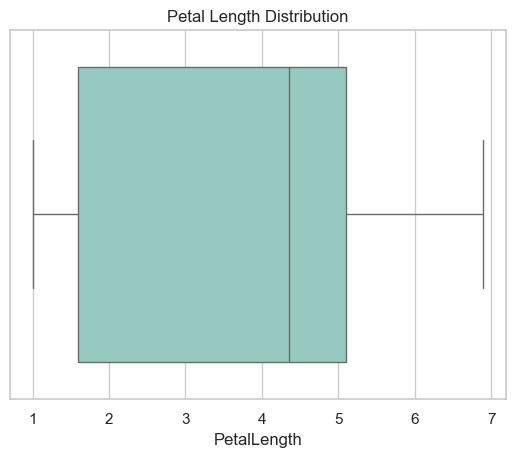

In [12]:
# 특정 칼럼의 범위 확인 및 outlier 확인

sns.set_theme(style="whitegrid")
sns.boxplot(x="PetalLength", data=df, palette="Set3")
plt.title("Petal Length Distribution")
plt.show()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_12236\2498552643.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


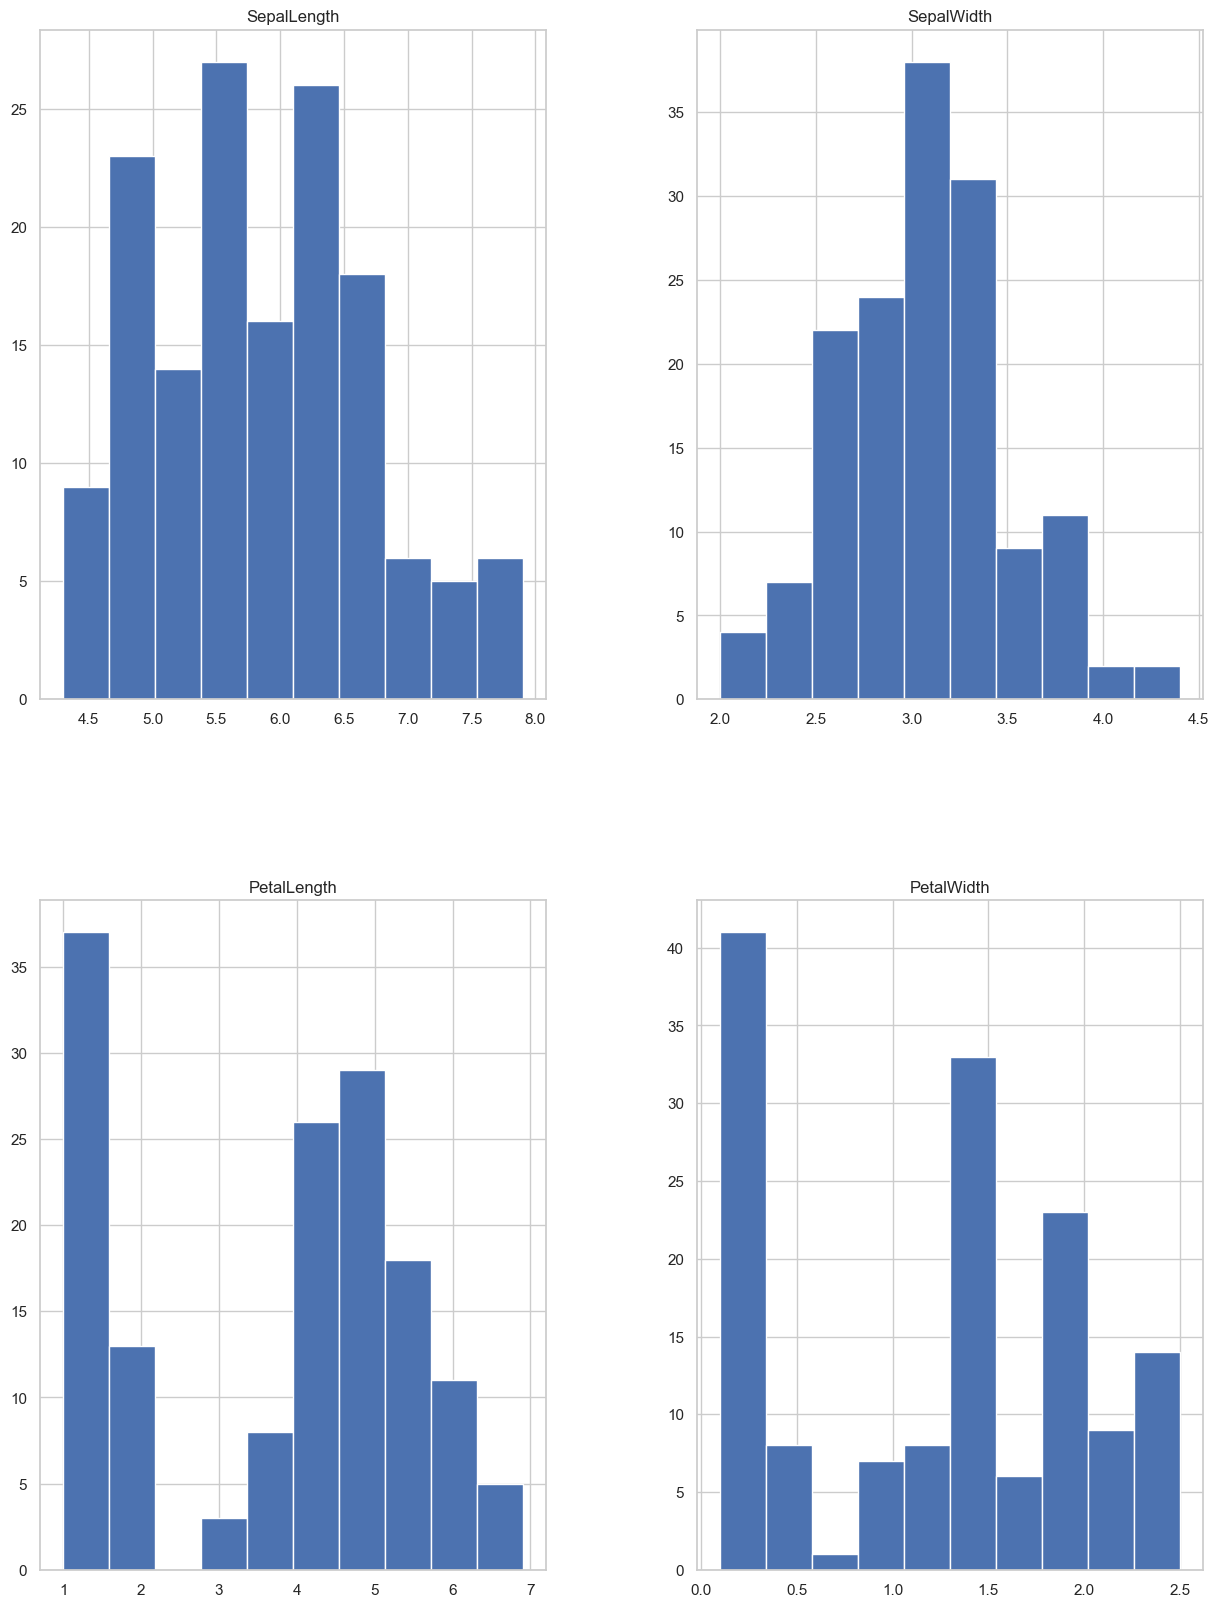

In [13]:
# 각 컬럼별 히스토 그램 확인

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

## 데이터 전처리 및 모델링

In [14]:
# Label Encoding for target variable
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Name_encoded'] = le.fit_transform(df['Name'])
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,Name_encoded
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [15]:
X = df.drop(['Name', 'Name_encoded'], axis=1)
X.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,Name_encoded
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [17]:
y = df['Name_encoded']
y.value_counts()

Name_encoded
0    50
1    50
2    50
Name: count, dtype: int64

In [18]:
# Original class names mapping
print("Class mapping:")
for i, name in enumerate(le.classes_):
    print(f"{i}: {name}")

Class mapping:
0: Iris-setosa
1: Iris-versicolor
2: Iris-virginica


In [19]:
print ("==================================")
print (" ACCURACY OF OTHER ML CLASSIFIERS" )
print ("==================================")

 ACCURACY OF OTHER ML CLASSIFIERS


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [22]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.9736842105263158
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [23]:
# Build a logistic regression classifier and predict

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.9736842105263158
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [24]:
clf_nn = MLPClassifier(random_state=0)
clf_nn.fit(X_train, y_train)

pred_nn = clf_nn.predict(X_test)

print ("\n--- Neural Network Classifier ---")
print (accuracy_score(y_test, pred_nn))
print (confusion_matrix(y_test, pred_nn))


--- Neural Network Classifier ---
0.9736842105263158
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


c:\Users\wlsgh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [25]:
# Build a decision tree classifier and predict

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.9736842105263158
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Random Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Random Forest ---
0.9736842105263158
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


## Neural Network with TensorFlow/Keras

In [27]:
# Normalize the data for neural network
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
# Convert target to one-hot encoding for categorical classification
num_classes = len(np.unique(y))
y_train_onehot = keras.utils.to_categorical(y_train, num_classes)
y_test_onehot = keras.utils.to_categorical(y_test, num_classes)

In [29]:
# Build Keras model for multi-class classification
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(num_classes, activation='softmax')  # Use softmax for multi-class classification
])

In [30]:
# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Use categorical_crossentropy for multi-class
              metrics=['accuracy'])

In [31]:
# Train model with early stopping
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train_scaled, y_train_onehot,
    batch_size=16,  # Smaller batch size for small dataset
    epochs=100,
    validation_data=(X_test_scaled, y_test_onehot),
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100
7/7 [==============================] - 3s 107ms/step - loss: 1.0990 - accuracy: 0.3214 - val_loss: 1.0788 - val_accuracy: 0.2368
Epoch 2/100
7/7 [==============================] - 0s 17ms/step - loss: 0.9796 - accuracy: 0.5089 - val_loss: 0.9850 - val_accuracy: 0.5789
Epoch 3/100
7/7 [==============================] - 0s 16ms/step - loss: 0.8958 - accuracy: 0.6964 - val_loss: 0.8950 - val_accuracy: 0.5789
Epoch 4/100
7/7 [==============================] - 0s 16ms/step - loss: 0.8027 - accuracy: 0.7411 - val_loss: 0.8108 - val_accuracy: 0.6579
Epoch 5/100
7/7 [==============================] - 0s 17ms/step - loss: 0.7422 - accuracy: 0.7500 - val_loss: 0.7315 - val_accuracy: 0.6579
Epoch 6/100
7/7 [==============================] - 0s 17ms/step - loss: 0.6401 - accuracy: 0.8214 - val_loss: 0.6601 - val_accuracy: 0.7105
Epoch 7/100
7/7 [==============================] - 0s 17ms/step - loss: 0.5544 - accuracy: 0.8304 - val_loss: 0.5976 - val_accuracy: 0.7368
Epoch 8/100
7/7 [==

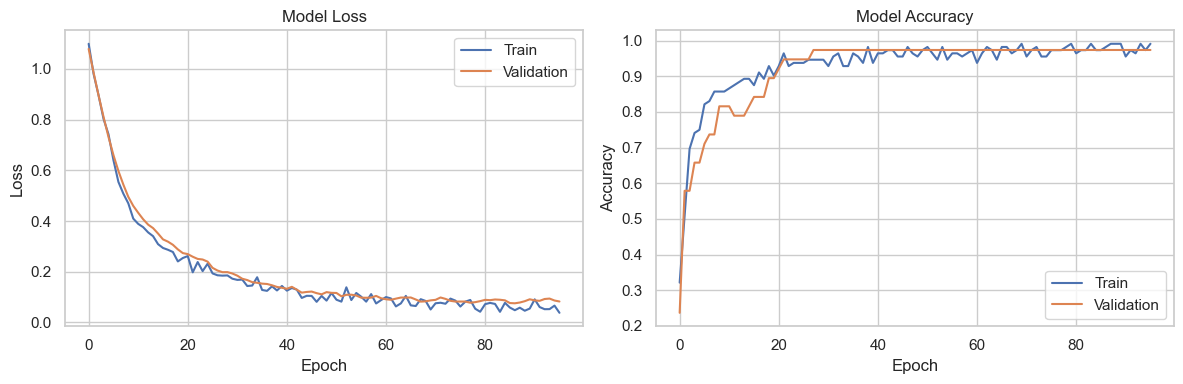

In [32]:
# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.tight_layout()
plt.show()

In [33]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test_scaled, y_test_onehot)
print(f"Test Accuracy: {accuracy:.4f}")

2/2 [==============================] - 0s 8ms/step - loss: 0.0765 - accuracy: 0.9737
Test Accuracy: 0.9737


In [34]:
# Make predictions with the neural network
y_pred_prob = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_prob, axis=1)

# Calculate confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

2/2 [==============================] - 0s 4ms/step
Confusion Matrix:
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [35]:
# KNN Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {'n_neighbors': np.arange(1, 30, 2),
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']}

# Create KNN classifier
knn = KNeighborsClassifier()

# Use GridSearch to find the best parameters
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Print best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
Best cross-validation score: 0.9644268774703558


In [36]:
# Use the best model
best_knn = grid_search.best_estimator_
y_pred_knn = best_knn.predict(X_test_scaled)

print("\n--- KNN with Best Parameters ---")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))


--- KNN with Best Parameters ---
Accuracy: 0.9736842105263158
Confusion Matrix:
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
